In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Įsikeliu duomenis apie užkrečiamųjų ligų atvejus iš Oficialiosios statistikos portalo.

sergamumas = pd.read_csv('bendrieji.csv')

C:\Users\dovil\AppData\Local\Temp\ipykernel_172008\1431679896.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  sergamumas = pd.read_csv('bendrieji.csv')


In [9]:
sergamumas.head()

,_type,_id,_revision,_page.next,centras,registravimo_vieta,miestas,tlk._id,galutine_diagnoze,ligonis_hospitalizuotas,socialiai_apdraustas,infekcijos_tipas,is_salies,ligos_klinikine_eiga,atvyk,kreip_diag,pranesimo_menuo,mirtis,sukelejo_rusis,atvejai
0,datasets/gov/nvsc/uzkreciamos_ligos/atvejai/Be...,00008726-2431-4981-b689-b5c55c93b458,e310406b-9bd1-4238-a8d2-9bccbd42fc81,NaN,Vilniaus,Vilniaus m. sav.,Vilniaus m. sav.,512db18a-6427-40ba-9574-ec7eb418883b,Kitas lėtinis virusinis hepatitas,False,NaN,NaN,NaN,NaN,NaN,0,2024-03-01,NaN,NaN,3
1,datasets/gov/nvsc/uzkreciamos_ligos/atvejai/Be...,00009b1e-7840-4447-bbc8-7d9eb6aec9bd,c9485881-4a4f-4787-bb01-7ba1a90dd95e,NaN,Utenos,Visagino sav.,Visagino sav.,6b526d37-ec70-48c7-941e-9f5d9b6bec39,"Bakterijų sukelta žarnyno infekcija, nepatiksl...",True,True,ūmi liga,NaN,vidutinė,NaN,6,2018-01-01,NaN,NaN,1
2,datasets/gov/nvsc/uzkreciamos_ligos/atvejai/Be...,0000b54c-81c2-45ff-9df9-f35d0e2dad8f,8b5af4db-9068-4673-bf23-d7c82c68e322,NaN,Šiaulių,Akmenės r. sav.,Akmenės r. sav.,1b12a54e-69e1-4d9a-bf4f-bffd5675ed8c,"Plaučių tuberkuliozė, patvirtinta skreplių mik...",True,True,lėtinė infekcija,NaN,vidutinė,NaN,5,2016-11-01,NaN,Mycobacterium tuberculosis,1
3,datasets/gov/nvsc/uzkreciamos_ligos/atvejai/Be...,0000c16d-78d3-420f-b960-79507992f19f,933812d5-7da9-4ca3-96fb-fe9ec2dd37fa,NaN,Vilniaus,Vilniaus m. sav.,Vilniaus m. sav.,78fabf73-5a5d-4f08-a00b-17615ecdcbfd,Kampilobakterijų sukeltas enteritas,False,True,ūmi liga,NaN,vidutinė,NaN,9,2012-07-01,NaN,Campylobacter spp.,4
4,datasets/gov/nvsc/uzkreciamos_ligos/atvejai/Be...,00012955-b2c2-4d26-8ed3-b39ac98b5885,a01da150-c4a2-4084-bfcd-1fc0705de639,NaN,Vilniaus,Vilniaus m. sav.,Vilniaus m. sav.,98181fab-0246-41b5-b3fd-ea69127a8bfb,Nagų grybelis,False,True,lėtinė infekcija,NaN,vidutinė,NaN,2,2018-03-01,NaN,NaN,16


In [11]:
sergamumas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296260 entries, 0 to 296259
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   _type                    296260 non-null  object 
 1   _id                      296260 non-null  object 
 2   _revision                296260 non-null  object 
 3   _page.next               1 non-null       object 
 4   centras                  296260 non-null  object 
 5   registravimo_vieta       291781 non-null  object 
 6   miestas                  292527 non-null  object 
 7   tlk._id                  296260 non-null  object 
 8   galutine_diagnoze        296260 non-null  object 
 9   ligonis_hospitalizuotas  296260 non-null  bool   
 10  socialiai_apdraustas     188799 non-null  object 
 11  infekcijos_tipas         245735 non-null  object 
 12  is_salies                2170 non-null    object 
 13  ligos_klinikine_eiga     164822 non-null  object 
 14  atvy

In [13]:
#  Toliau - duomenų validacija ir keitimas
# info() matyti, kad tuščių verciu yra. Patikrinu papildomai:

sergamumas.isna().sum()


_type                           0
_id                             0
_revision                       0
_page.next                 296259
centras                         0
registravimo_vieta           4479
miestas                      3733
tlk._id                         0
galutine_diagnoze               0
ligonis_hospitalizuotas         0
socialiai_apdraustas       107461
infekcijos_tipas            50525
is_salies                  294090
ligos_klinikine_eiga       131438
atvyk                      294980
kreip_diag                      0
pranesimo_menuo               101
mirtis                     294890
sukelejo_rusis             199920
atvejai                         0
dtype: int64

In [41]:
# Pakeičiu tuščias vertes.

sergamumas = sergamumas.fillna("Nėra duomenų")

In [43]:
# Ištrinu analizei nenaudojamus stulpelius.

sergamumas = sergamumas.drop(["_type", "_revision", "_page.next", "tlk._id", "is_salies", "atvyk"], axis = 1)

# Pakeičiu ID stuleplio eikšmes.

sergamumas["_id"] = range(1, len(sergamumas)+1)
sergamumas.head(5)

,_id,centras,registravimo_vieta,miestas,galutine_diagnoze,ligonis_hospitalizuotas,socialiai_apdraustas,infekcijos_tipas,ligos_klinikine_eiga,kreip_diag,pranesimo_menuo,mirtis,sukelejo_rusis,atvejai
0,1,Vilniaus,Vilniaus m. sav.,Vilniaus m. sav.,Kitas lėtinis virusinis hepatitas,False,Nėra duomenų,Nėra duomenų,Nėra duomenų,0,2024-03-01,Nėra duomenų,Nėra duomenų,3
1,2,Utenos,Visagino sav.,Visagino sav.,"Bakterijų sukelta žarnyno infekcija, nepatiksl...",True,True,ūmi liga,vidutinė,6,2018-01-01,Nėra duomenų,Nėra duomenų,1
2,3,Šiaulių,Akmenės r. sav.,Akmenės r. sav.,"Plaučių tuberkuliozė, patvirtinta skreplių mik...",True,True,lėtinė infekcija,vidutinė,5,2016-11-01,Nėra duomenų,Mycobacterium tuberculosis,1
3,4,Vilniaus,Vilniaus m. sav.,Vilniaus m. sav.,Kampilobakterijų sukeltas enteritas,False,True,ūmi liga,vidutinė,9,2012-07-01,Nėra duomenų,Campylobacter spp.,4
4,5,Vilniaus,Vilniaus m. sav.,Vilniaus m. sav.,Nagų grybelis,False,True,lėtinė infekcija,vidutinė,2,2018-03-01,Nėra duomenų,Nėra duomenų,16


In [97]:
# Keičiu duomenų tipus.

sergamumas = sergamumas.astype({"_id": "int", "ligonis_hospitalizuotas" : "bool", "socialiai_apdraustas" : "bool",
                                "kreip_diag" : "int", "atvejai" : "int" })


In [234]:
# Duomenų sumarizacija

atveju_skaicius = sergamumas["atvejai"].sum()
print(f"Bendras registruotų infekcijų skaičius: {atveju_skaicius}.")

atvejai_per_metus = sergamumas.groupby("metai")["atvejai"].sum()
vidutinis_atveju_skaicius = atvejai_per_metus.mean().round(1)

hospitalizacijos_metams = sergamumas[sergamumas['ligonis_hospitalizuotas']].groupby('metai').size()
vidutinis_hospitalizaciju_skaicius = hospitalizacijos_metams.mean().round(1)

print(f"Vidutinis užsikrėtusiųjų skaičius per metus: {vidutinis_atveju_skaicius}, iš jų hospitalizuojama vidutiniškai: {vidutinis_hospitalizaciju_skaicius}.")

mirciu_skaicius = (sergamumas["mirtis"] == True).sum()
print(f"Užregistruota mirties atvejų: {mirciu_skaicius}.")

sergamumas["pranesimo_menuo"] = pd.to_datetime(sergamumas["pranesimo_menuo"], errors='coerce')
sergamumas = sergamumas.dropna(subset=["pranesimo_menuo"]) 
sergamumas["pranesimo_menuo"] = sergamumas["pranesimo_menuo"].dt.date

pradzios_data = sergamumas["pranesimo_menuo"].min() 
pabaigos_data = sergamumas["pranesimo_menuo"].max() 
print(f"Analizėje apimamas laikotarpis nuo {pradzios_data} iki {pabaigos_data}.")


Bendras registruotų infekcijų skaičius: 882887.
Vidutinis užsikrėtusiųjų skaičius per metus: 55180.4, iš jų hospitalizuojama vidutiniškai: 8128.5.
Užregistruota mirties atvejų: 1368.
Analizėje apimamas laikotarpis nuo 2009-11-01 iki 2024-11-01.


In [99]:
# Verslo klausimai

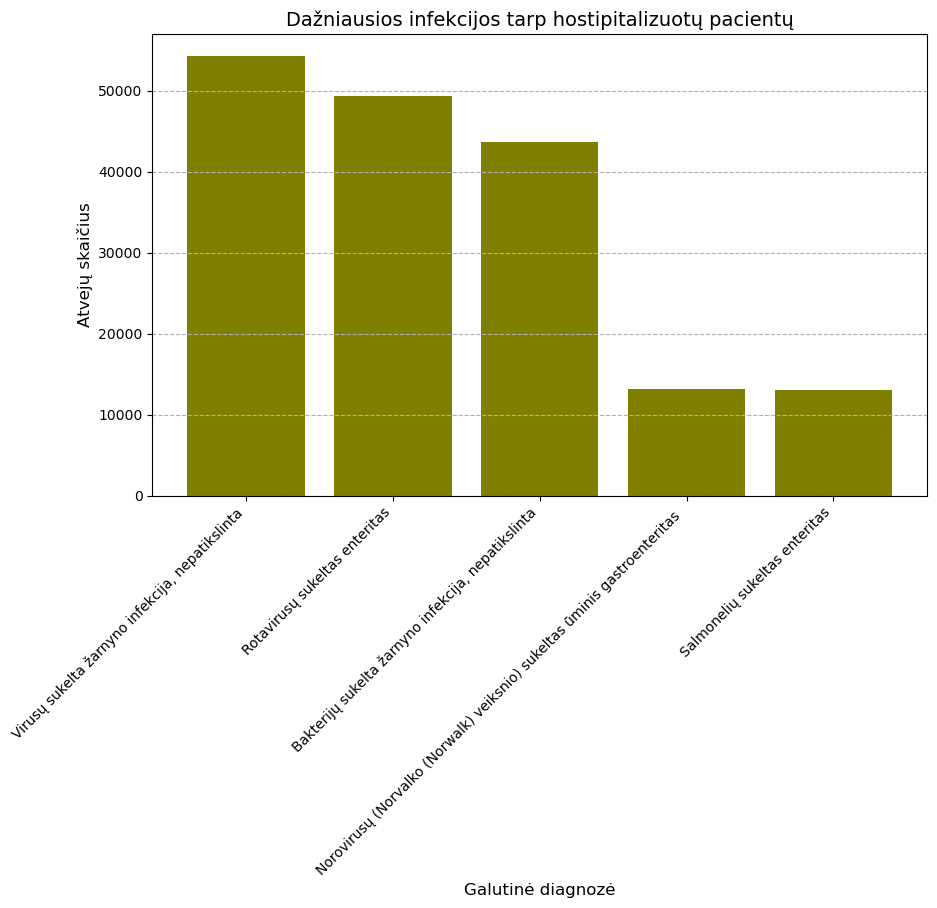

In [162]:
# Kokios buvo dažniausios infekcijos tarp hospitalizuotų pacientų?

hospitalizacijos = sergamumas[sergamumas["ligonis_hospitalizuotas"] == True]
hospitalizacijos_pagal_infekcija = hospitalizacijos.groupby(["galutine_diagnoze"])["atvejai"].sum()

dazniausios_infekcijos = hospitalizacijos_pagal_infekcija.nlargest(5)

plt.figure(figsize=(10, 6)) 
plt.bar(dazniausios_infekcijos.index, dazniausios_infekcijos.values, color ="olive")
plt.title("Dažniausios infekcijos tarp hostipitalizuotų pacientų", fontsize=14)
plt.xlabel("Galutinė diagnozė", fontsize=12)
plt.ylabel("Atvejų skaičius",fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--')
plt.show()

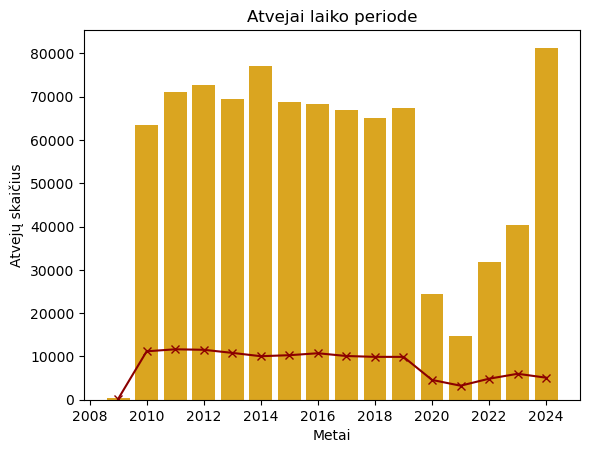

In [152]:
# Kaip kito registruotų infekcijų bei hospitalizuotų pacientų skaičius laiko periode?

sergamumas['pranesimo_menuo'] = pd.to_datetime(sergamumas['pranesimo_menuo'])
sergamumas['metai'] = sergamumas['pranesimo_menuo'].dt.year
hospitalizacijos_metams = sergamumas[sergamumas['ligonis_hospitalizuotas']].groupby('metai').size()
atvejai_metams = sergamumas.groupby('metai')['atvejai'].sum().reset_index()

plt.bar(atvejai_metams["metai"], atvejai_metams["atvejai"], color = "goldenrod")
plt.plot( hospitalizacijos_metams, marker = 'x', color ='darkred')
plt.title('Atvejai laiko periode')
plt.xlabel('Metai')
plt.ylabel('Atvejų skaičius')
plt.show()

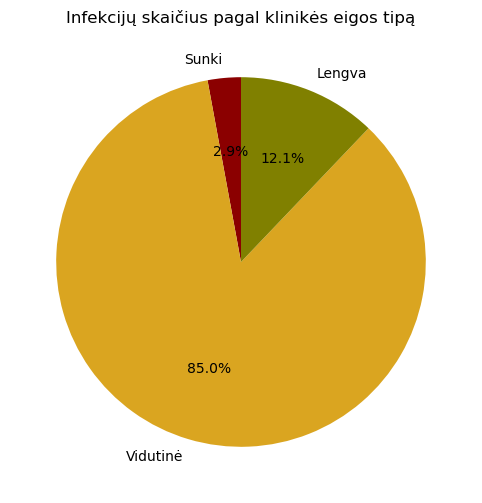

In [164]:
# Kokią dalį bendro infekcijų skaičiaus sudarė lengvos, vidutinės ir sunkios ligos eigos tipai?

sunkus_atvejai = (sergamumas['ligos_klinikine_eiga'] == 'sunki').sum()
vidutiniai_atvejai = (sergamumas['ligos_klinikine_eiga'] == 'vidutinė').sum()
lengvi_atvejai = (sergamumas['ligos_klinikine_eiga'] == 'lengva').sum()

labels = ['Sunki', 'Vidutinė', 'Lengva']
sizes = [sunkus_atvejai, vidutiniai_atvejai, lengvi_atvejai]
colors = ['darkred', 'goldenrod', 'olive']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors = colors)
plt.title('Infekcijų skaičius pagal klinikės eigos tipą')
plt.show()


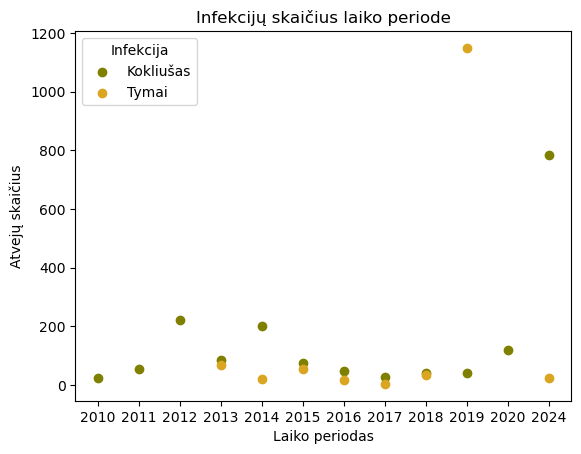

In [184]:
# Dėl sumažėjusios vaikų vakcinacijos ima daugėti atvejų ligų, kurios jau buvo itin retos mūsų visuomenėje. Diagramoje
# matyti kaip kito kokliušo bei tymų atvejų skaičiai per paskutinius 15 metų.

kokliusas = sergamumas[sergamumas["galutine_diagnoze"].str.contains("Kokliušas", case=False, na=False)]
kokliusas_per_metus = kokliusas.groupby("metai")["atvejai"].sum().reset_index()

tymai = sergamumas[sergamumas["galutine_diagnoze"].str.contains("Tymai", case=False, na=False)]
tymai_per_metus = tymai.groupby("metai")["atvejai"].sum().reset_index()

plt.scatter(kokliusas_per_metus["metai"].astype(str),kokliusas_per_metus["atvejai"], label = "Kokliušas", color = "olive")
plt.scatter(tymai_per_metus["metai"].astype(str), tymai_per_metus["atvejai"], label="Tymai", color="goldenrod")
plt.title("Infekcijų skaičius laiko periode")
plt.ylabel("Atvejų skaičius")
plt.xlabel("Laiko periodas")
plt.legend(title="Infekcija", loc="upper left")
plt.show()